In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [3]:
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [11]:
climate = pd.read_csv(os.path.join(path, 'weather_data_scaled.csv'))

In [7]:
pleasantdf = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [73]:
# Dropping unrelated station data from main dataset
df = climate.drop(columns=['GDANSK_cloud_cover',
'GDANSK_humidity',
'GDANSK_precipitation',
'GDANSK_snow_depth',
'GDANSK_temp_mean',
'GDANSK_temp_min',
'GDANSK_temp_max','ROMA_cloud_cover',
'ROMA_wind_speed',
'ROMA_humidity',
'ROMA_pressure',
'ROMA_sunshine',
'ROMA_temp_mean','TOURS_wind_speed',
'TOURS_humidity',
'TOURS_pressure',
'TOURS_global_radiation',
'TOURS_precipitation',
'TOURS_temp_mean',
'TOURS_temp_min',
'TOURS_temp_max'])

In [75]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [19]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [21]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [25]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [27]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

[Text(0.335718854047999, 0.9838709677419355, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07062055037291505, 0.9516129032258065, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.0195073212007969, 0.9193548387096774, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0]\n[7558.0, 0.0]\n[7414.0, 144.0]\n[7524.0, 34.0]\n[7558.0, 

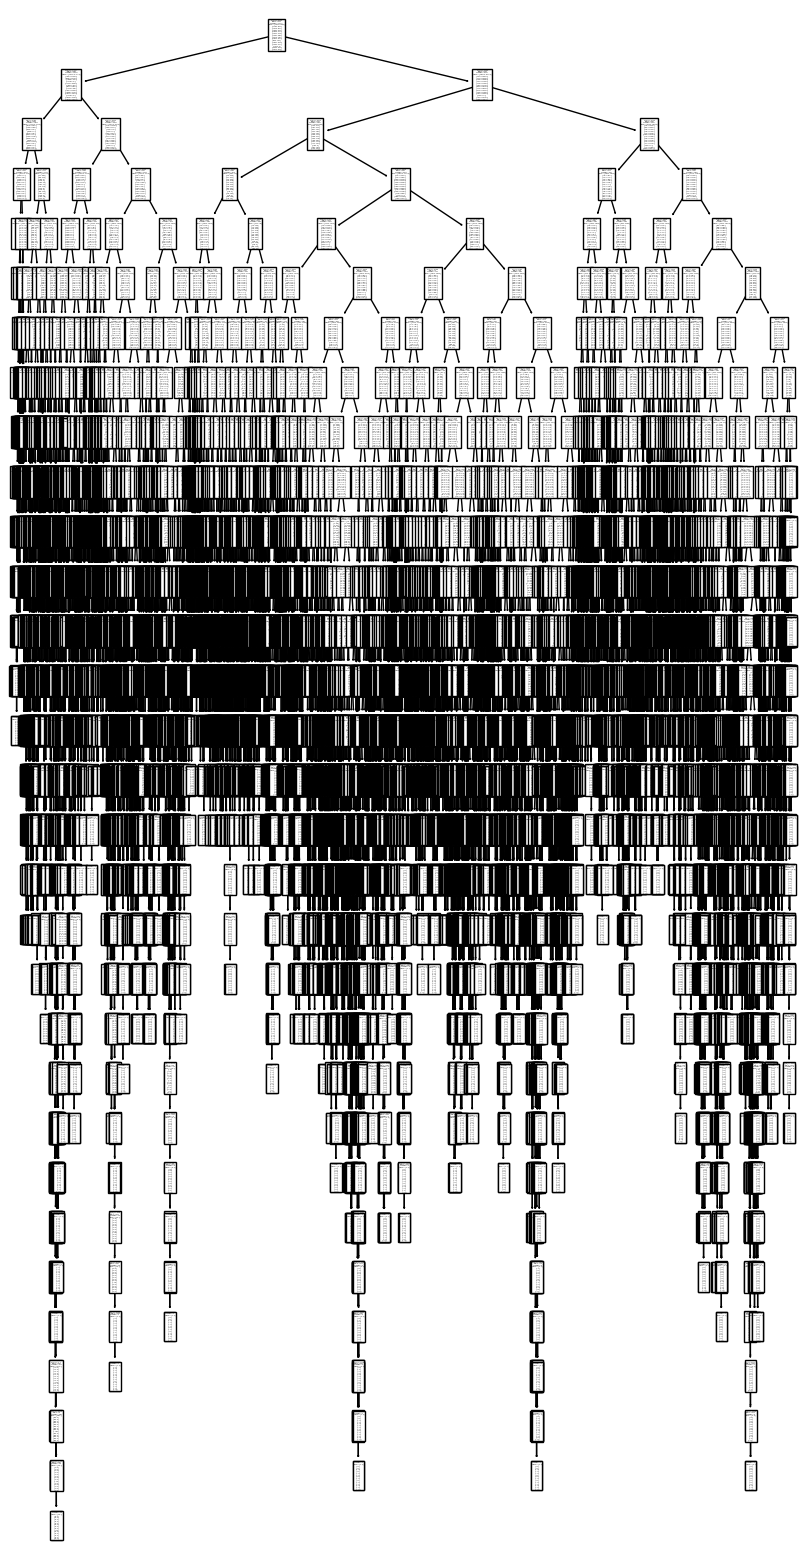

In [29]:
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [31]:
#cross validation method
y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.46159647589746755


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4264
           1       1.00      1.00      1.00      6030
           2       1.00      1.00      1.00      5593
           3       1.00      1.00      1.00      3358
           4       1.00      1.00      1.00      3703
           5       1.00      1.00      1.00      3791
           6       1.00      1.00      1.00      2851
           7       1.00      1.00      1.00      4833
           8       1.00      1.00      1.00      3590
           9       1.00      1.00      1.00      7677
          10       1.00      1.00      1.00      3575
          11       1.00      1.00      1.00      2720
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2922
          14       1.00      1.00      1.00       898

   micro avg       1.00      1.00      1.00     55805
   macro avg       0.93      0.93      0.93     55805
weighted avg       1.00   

C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-package

In [35]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [61]:
y_pred_test = activedt.predict(X_test)

In [69]:
#cross validation method
print('Train accuracy score: ',cross_val_score(activedt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4597423413610611


In [71]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      1400
           1       0.71      0.73      0.72      1962
           2       0.72      0.72      0.72      1838
           3       0.67      0.69      0.68      1101
           4       0.67      0.66      0.67      1231
           5       0.63      0.63      0.63      1168
           6       0.65      0.65      0.65       923
           7       0.68      0.71      0.70      1543
           8       0.68      0.68      0.68      1176
           9       0.86      0.85      0.85      2570
          10       0.68      0.68      0.68      1192
          11       0.62      0.63      0.63       859
          12       0.00      0.00      0.00         0
          13       0.63      0.58      0.60       972
          14       0.37      0.36      0.36       276

   micro avg       0.70      0.70      0.70     18211
   macro avg       0.62      0.62      0.62     18211
weighted avg       0.69   

C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickr\anaconda3\Lib\site-package

C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


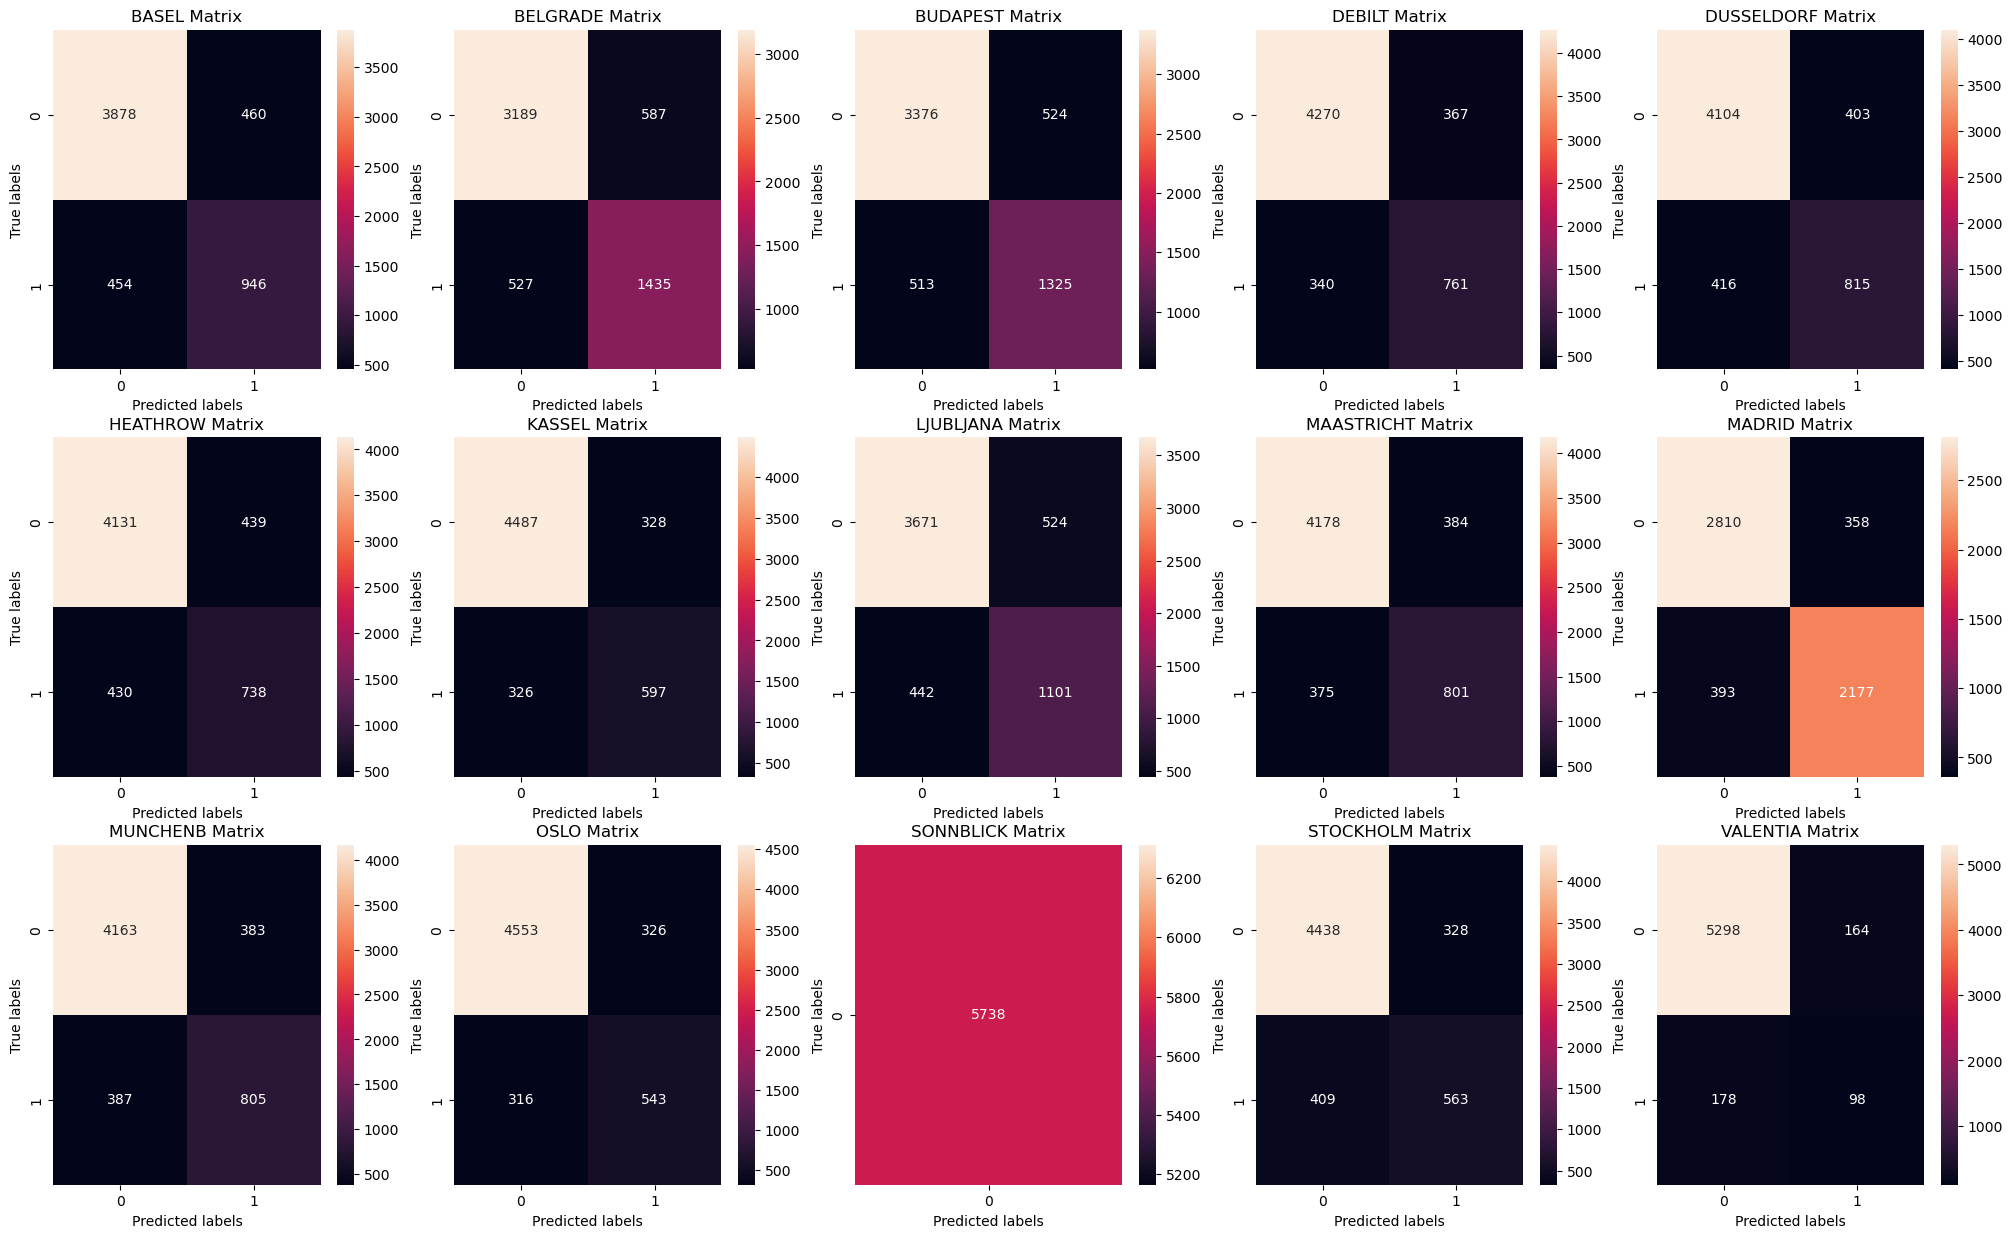

In [63]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\nickr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


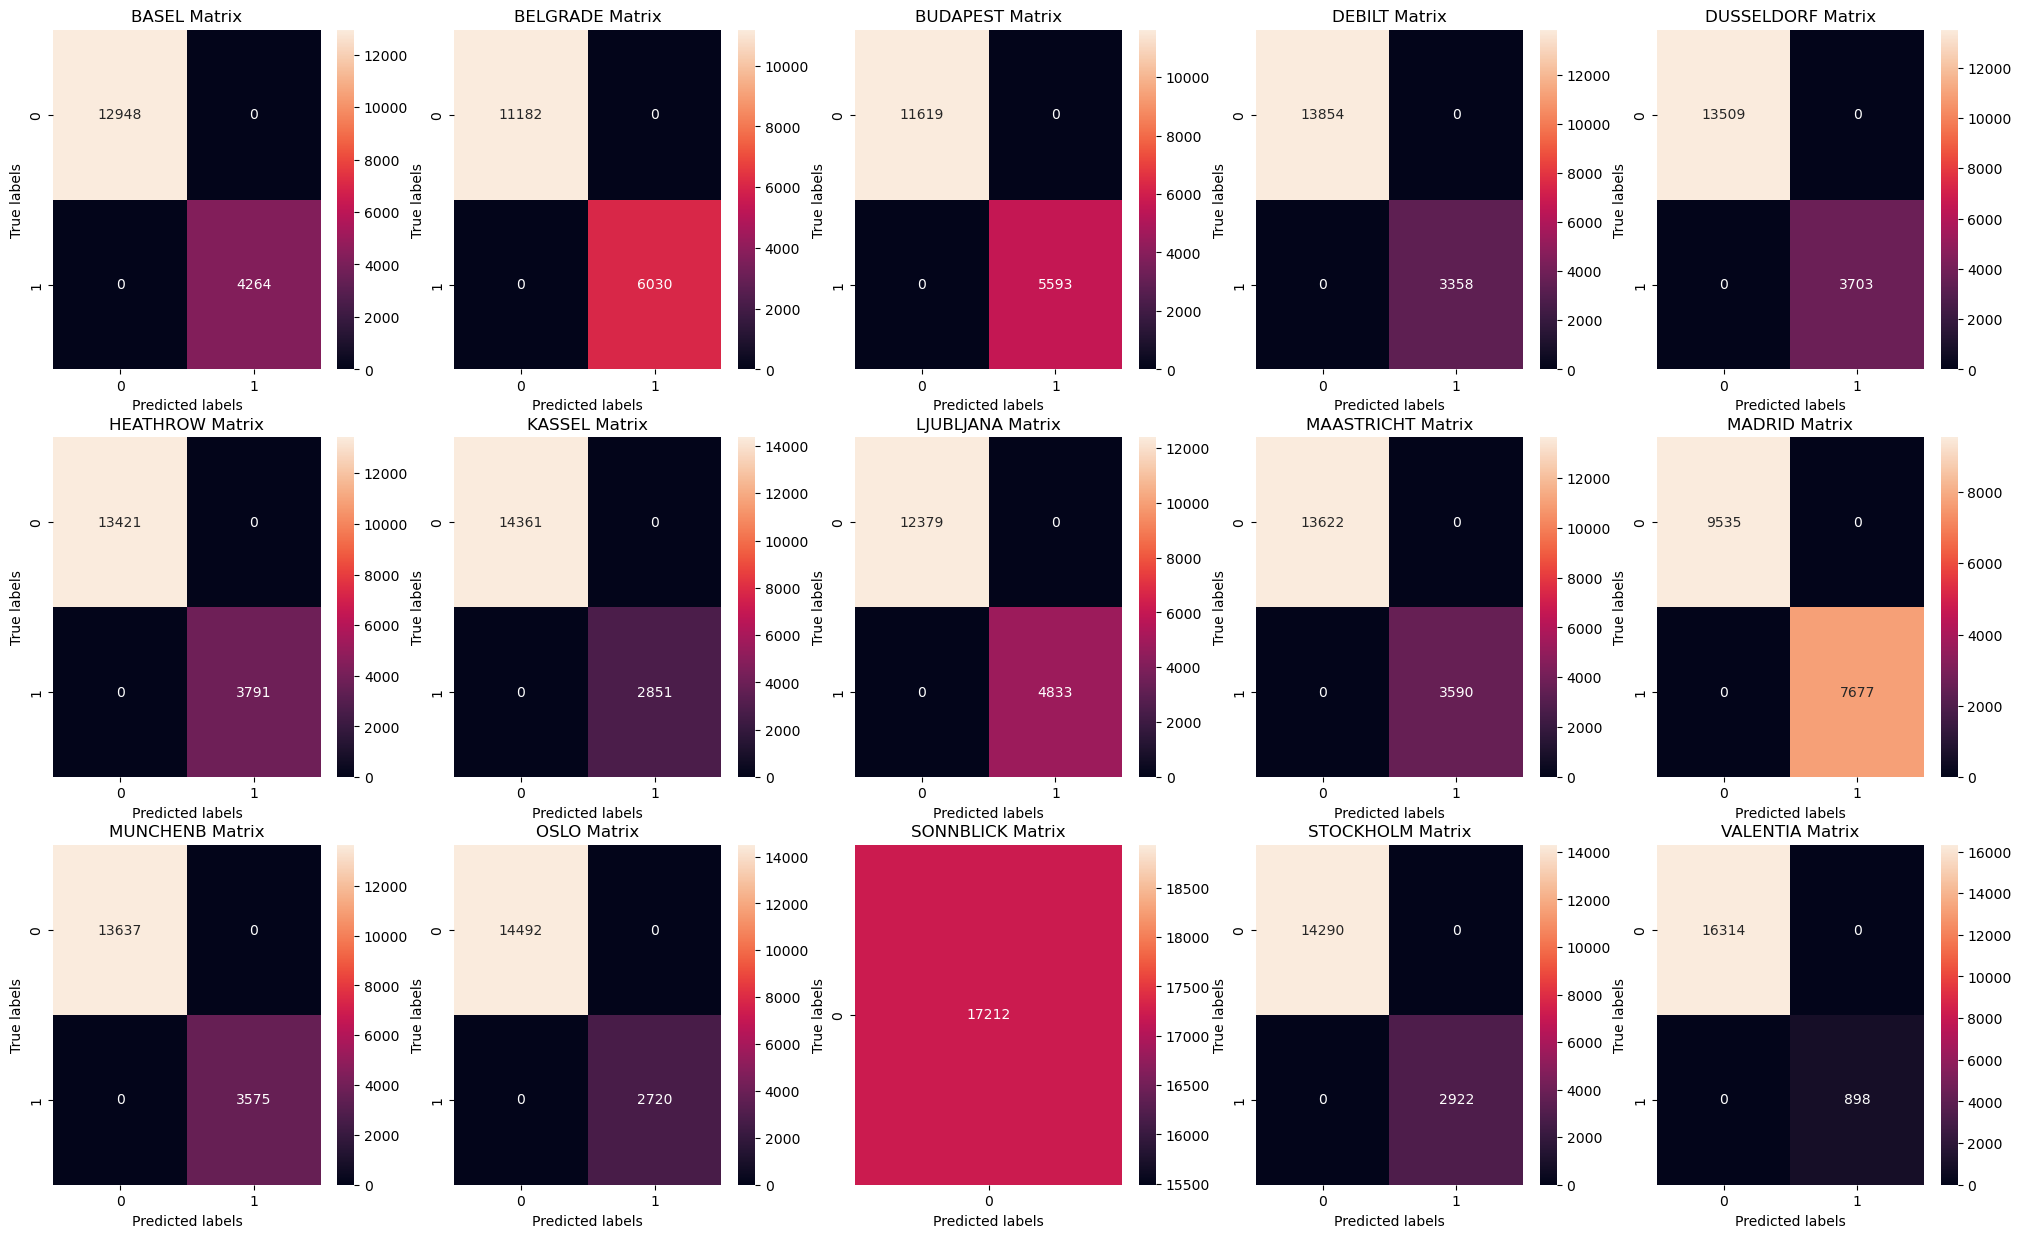

In [67]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1